**Data Acquisition**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Loading datasets from csv to pandas dataframe
trades_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

**Data Exploration**

In [ ]:
# Viewing first 5 rows of trades_df
trades_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
# Viewing first 5 rows of sentiment_df
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# Provides the number of rows and columns in trade dataset.
print(trades_df.shape)
# Identifying the data types of each column.
print(trades_df.dtypes)

(211224, 16)
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


In [ ]:
# Provides the number of rows and columns in sentiment dataset.
print(sentiment_df.shape)
# Identifies the data types of each column.
print(sentiment_df.dtypes)

(2644, 4)
timestamp          int64
value              int64
classification    object
date              object
dtype: object


**Data Cleaning**

In [ ]:
# Removing unnecessary columns in trade df
cols_to_drop = ['Transaction Hash', 'Order ID', 'Trade ID', 'Timestamp']
trades_df = trades_df.drop(columns=cols_to_drop)

In [ ]:
# Displaying the shape of trade df after removing unnecessary columns
print(trades_df.shape)

(211224, 12)


In [ ]:
# Returns the number of missing values in each column in trade df
trades_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
# Returns the number of missing values in each column in sentiment df
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [ ]:
# Replacing coins less than 500 counts with 'Others'
coin_count = trades_df['Coin'].value_counts()
updated_coin = coin_count[coin_count<500]
trades_df['Coin'] = trades_df['Coin'].apply(lambda x: 'Others' if x in updated_coin else x )
print(trades_df['Coin'].value_counts())
#Returns the number of unique job titles after the update
print(trades_df['Coin'].nunique())

Coin
HYPE         68005
@107         29992
BTC          26064
Others       15620
ETH          11158
SOL          10691
FARTCOIN      4650
MELANIA       4428
PURR/USDC     2774
WLD           1983
SUI           1979
TRUMP         1920
XRP           1774
kPEPE         1730
kBONK         1647
FTT           1560
ONDO          1463
@142          1309
PAXG          1265
ZRO           1239
PURR          1198
PENDLE        1165
POPCAT        1152
TAO           1082
BERA          1054
JELLY          992
ENA            990
PENGU          927
@4             885
DOGE           826
AIXBT          819
VINE           811
ZEREBRO        769
TNSR           693
APE            692
ANIME          660
JUP            644
USUAL          598
W              592
PNUT           586
AAVE           585
ADA            581
VIRTUAL        570
GRIFFAIN       562
AI16Z          540
Name: count, dtype: int64
45


In [ ]:
# Converting format of numeric columns
numeric_cols = ['Execution Price','Size Tokens','Size USD','Closed PnL','Fee']
for col in numeric_cols:
    trades_df[col] = pd.to_numeric(trades_df[col], errors='coerce')

# Standardizing text of two datasets
trades_df['Side'] = trades_df['Side'].str.upper().str.strip()
trades_df['Direction'] = trades_df['Direction'].str.title().str.strip()
sentiment_df['classification'] = sentiment_df['classification'].str.title().str.strip()

# Parsing date from timestamps of two datasets
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
trades_df['date'] = trades_df['Timestamp IST'].dt.date

#Converting to date formats
trades_df['date'] = pd.to_datetime(trades_df['date'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Handling extreme outliers in Size USD
q_low = trades_df['Size USD'].quantile(0.01)
q_high = trades_df['Size USD'].quantile(0.99)
trades_df['Size USD'] = trades_df['Size USD'].clip(lower=q_low, upper=q_high)

print(trades_df.head())
print(sentiment_df.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  Crossed       Fee       date  
0         0.0     True  0.345404 2024-12-02  


**Data Integration**

In [ ]:
# Merging sentiment and trade df by date
columns_to_join = sentiment_df[['date', 'classification', 'value']]

# Performing a left merge
df = pd.merge(trades_df, columns_to_join, on='date', how='left')
df= df.rename(columns={"classification": "sentiment_class", "value": "sentiment_value"})

df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date,sentiment_class,sentiment_value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,True,0.345404,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,True,0.005600,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,True,0.050431,2024-12-02,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,True,0.050043,2024-12-02,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,True,0.003055,2024-12-02,Extreme Greed,80.0


**Feature Engineering**

In [ ]:
# Profitability flag
df['is_win'] = df['Closed PnL'] > 0

# Leverage proxy (trade size relative to median per account)
df['leverage_proxy'] = df.groupby('Account')['Size USD'].transform(lambda x: x / x.median())

# Fee ratio
df['fee_ratio'] = df['Fee'] / df['Size USD']

# Crossed as boolean
df['Crossed'] = df['Crossed'].astype(bool)

df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date,sentiment_class,sentiment_value,is_win,leverage_proxy,fee_ratio
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,True,0.345404,2024-12-02,Extreme Greed,80.0,False,6.994553,0.000044
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,True,0.005600,2024-12-02,Extreme Greed,80.0,False,0.113446,0.000044
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,True,0.050431,2024-12-02,Extreme Greed,80.0,False,1.022355,0.000044
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,True,0.050043,2024-12-02,Extreme Greed,80.0,False,1.014723,0.000044
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,True,0.003055,2024-12-02,Extreme Greed,80.0,False,0.061974,0.000044


In [ ]:
#Saving processed data to csv
df.to_csv("processed data.csv")

**Aggregation per Account per Day**

In [ ]:
agg_funcs = {
    'Closed PnL': ['sum','mean','std','count'],
    'Size USD': ['sum','mean'],
    'is_win':'mean',
    'fee_ratio':'mean',
    'Crossed':'mean',
    'leverage_proxy':'mean'
}

per_account_day = df.groupby(['Account','date']).agg(agg_funcs)
per_account_day.columns = ['_'.join(c).strip() for c in per_account_day.columns.values]
per_account_day = per_account_day.reset_index()

# Merging sentiment for daily summary
per_account_day = per_account_day.merge(
    sentiment_df[['date','classification','value']].rename(columns={'classification':'sentiment_class','value':'sentiment_value'}),
    on='date',
    how='left'
)
per_account_day.head()


,Account,date,Closed PnL_sum,Closed PnL_mean,Closed PnL_std,Closed PnL_count,Size USD_sum,Size USD_mean,is_win_mean,fee_ratio_mean,Crossed_mean,leverage_proxy_mean,sentiment_class,sentiment_value
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,0.000000,0.000000,177,900880.1300,5089.718249,0.000000,0.000123,0.090395,3.775307,Extreme Greed,76.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,0.000000,0.000000,68,542413.1800,7976.664412,0.000000,0.000115,0.058824,5.916705,Extreme Greed,90.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,0.000000,0.000000,40,372495.5377,9312.388442,0.000000,0.000116,0.000000,6.907480,Extreme Greed,83.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,-1768.916667,1526.178379,12,338240.0000,28186.666667,0.000000,0.000100,0.000000,20.907509,Extreme Greed,94.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,59.374074,172.316814,27,383163.9954,14191.259089,0.444444,0.000219,0.444444,10.526391,Extreme Greed,79.0


**Exploratory Data Analysis**

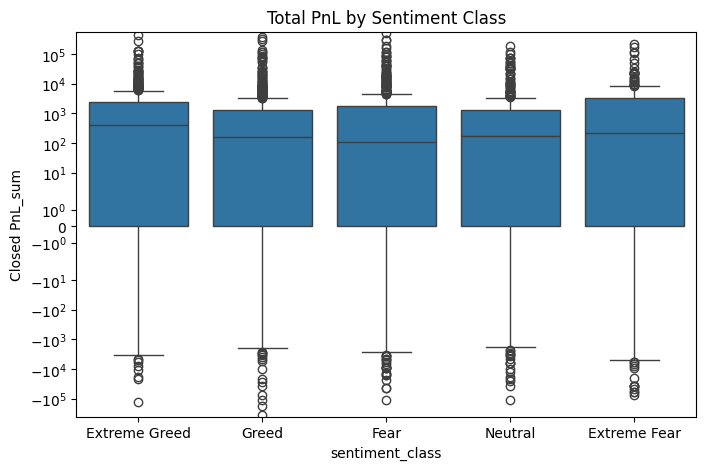

In [ ]:
# Total PnL by Sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment_class', y='Closed PnL_sum',
            data=per_account_day[per_account_day['sentiment_class'].isin(['Extreme Fear','Fear','Neutral','Greed','Extreme Greed'])])
plt.title('Total PnL by Sentiment Class')
plt.yscale('symlog')  # logarithmic scale for outliers
plt.savefig('outputs/total_pnl_by_sentiment.png', bbox_inches='tight')
plt.show()

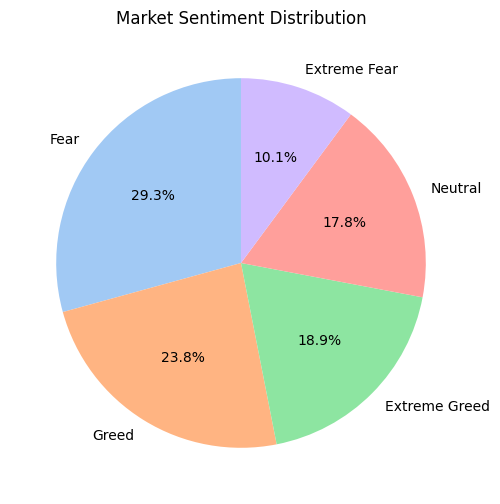

In [ ]:
# Sentiment Distribution
sent_counts = df['sentiment_class'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sent_counts, labels=sent_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Market Sentiment Distribution')
plt.savefig('outputs/sentiment_distribution.png', bbox_inches='tight')
plt.show()

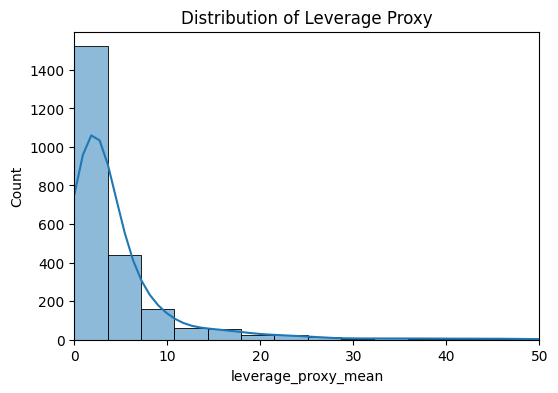

In [ ]:
# Leverage proxy Distribution
plt.figure(figsize=(6,4))
sns.histplot(per_account_day['leverage_proxy_mean'], bins=50, kde=True)
plt.xlim(0, 50)  # focus on leverage_proxy up to 50
plt.title('Distribution of Leverage Proxy')
plt.savefig('outputs/leverage_proxy_distribution.png', bbox_inches='tight')
plt.show()

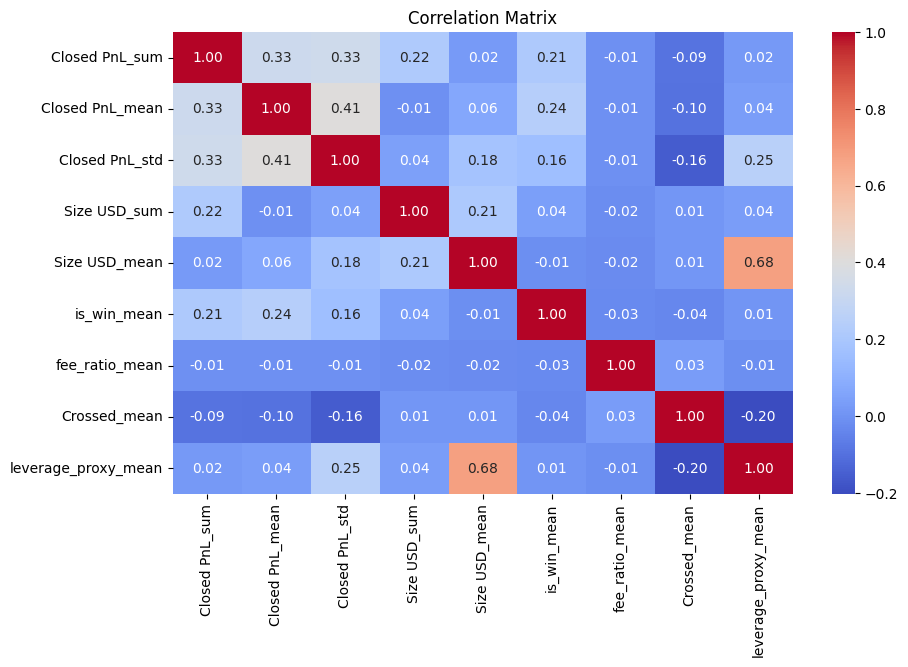

In [ ]:
# Correlation of Features : Heatmap
features = ['Closed PnL_sum','Closed PnL_mean','Closed PnL_std','Size USD_sum','Size USD_mean','is_win_mean','fee_ratio_mean','Crossed_mean','leverage_proxy_mean']
plt.figure(figsize=(10,6))
sns.heatmap(per_account_day[features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('outputs/correlation_matrix.png', bbox_inches='tight')
plt.show()

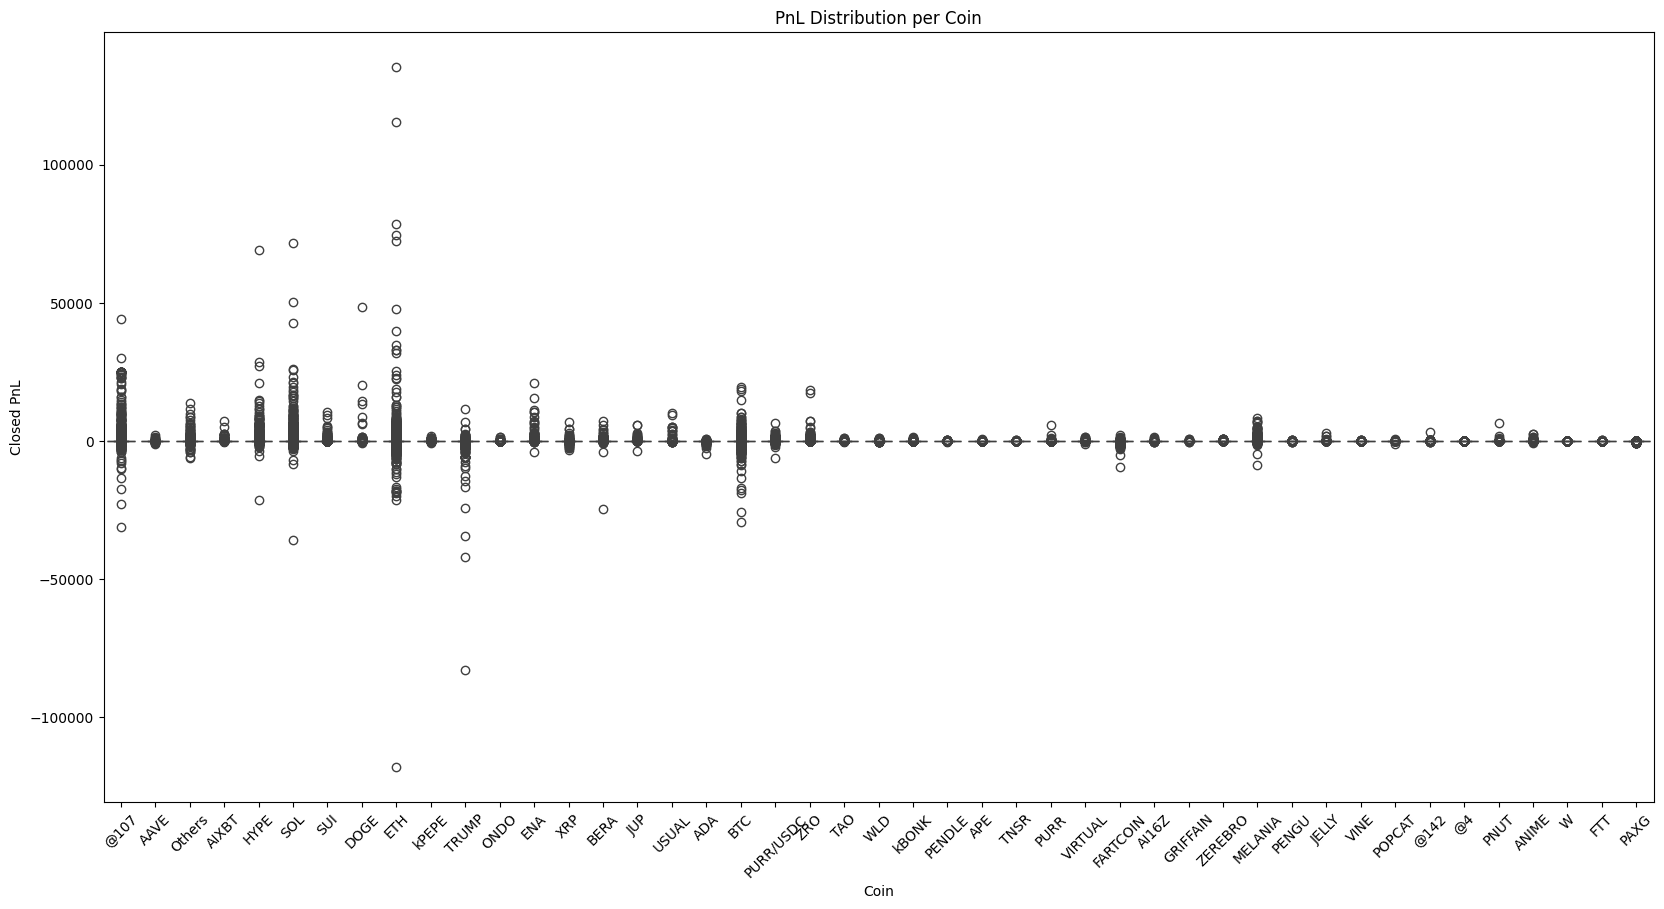

In [ ]:
# PnL Distribution by Coin
plt.figure(figsize=(20,10))
sns.boxplot(x='Coin', y='Closed PnL', data=df)
plt.xticks(rotation=45)
plt.title('PnL Distribution per Coin')
plt.ylabel('Closed PnL')
plt.xlabel('Coin')
plt.savefig('outputs/pnl_distribution_coin.png', bbox_inches='tight')
plt.show()

**Data Visualization**

/tmp/ipython-input-2352817512.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('outputs/pnl_vs_leverage_by_sentiment.png', bbox_inches='tight')


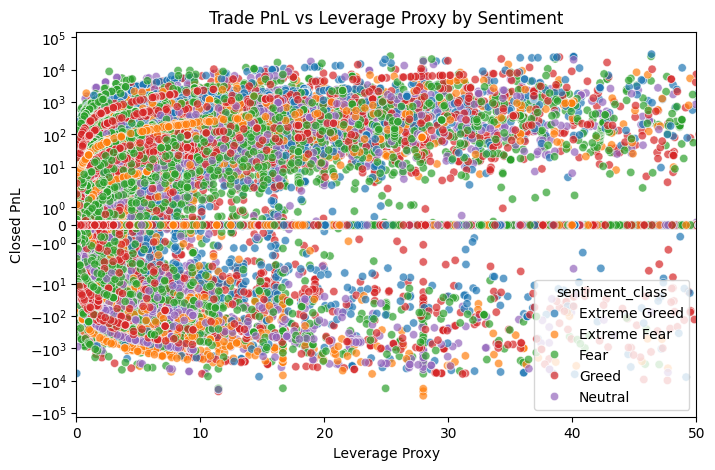

In [ ]:
#PnL vs Leverage Proxy by sentiment
plt.figure(figsize=(8,5))
sns.scatterplot(x='leverage_proxy', y='Closed PnL', hue='sentiment_class', data=df, alpha=0.7)
plt.xlim(0, 50)  # focus on leverage_proxy up to 50
plt.title('Trade PnL vs Leverage Proxy by Sentiment')
plt.xlabel('Leverage Proxy')
plt.ylabel('Closed PnL')
plt.yscale('symlog')  # handle extreme values
plt.savefig('outputs/pnl_vs_leverage_by_sentiment.png', bbox_inches='tight')
plt.show()

/tmp/ipython-input-1617161858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment_class', y='is_win', data=win_rate, palette='deep')


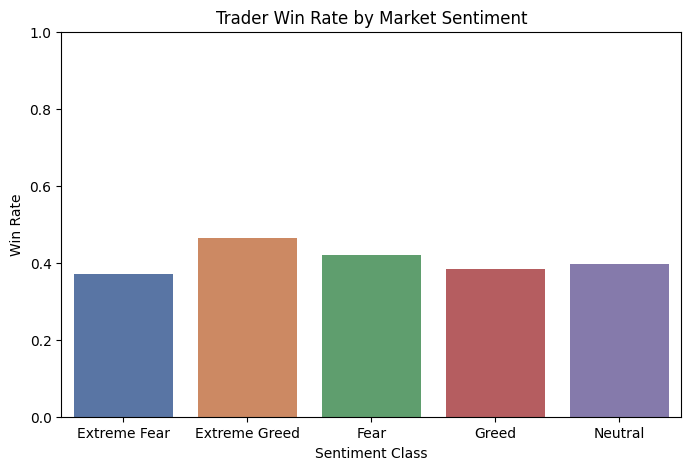

In [ ]:
#Win Rate by Sentiment Class
win_rate = df.groupby('sentiment_class')['is_win'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='sentiment_class', y='is_win', data=win_rate, palette='deep')
plt.title('Trader Win Rate by Market Sentiment')
plt.ylabel('Win Rate')
plt.xlabel('Sentiment Class')
plt.ylim(0,1)
plt.savefig('outputs/win_rate_by_sentiment.png', bbox_inches='tight')
plt.show()

/tmp/ipython-input-2224441446.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment_class', y='Size USD', data=volume, palette='viridis')


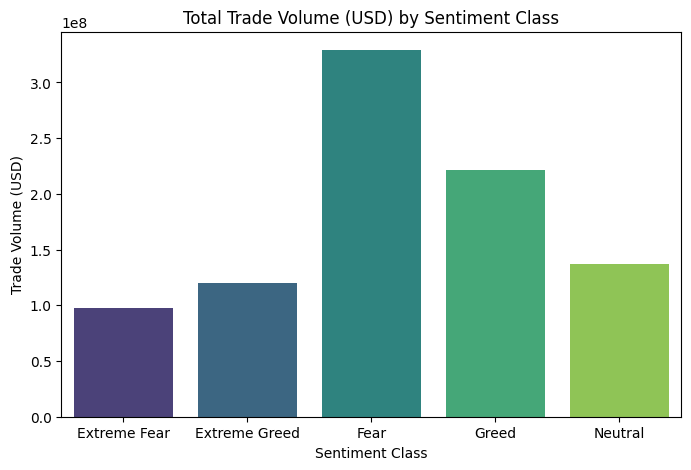

In [ ]:
#Trade Volume (USD) by Sentiment Class
volume = df.groupby('sentiment_class')['Size USD'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='sentiment_class', y='Size USD', data=volume, palette='viridis')
plt.title('Total Trade Volume (USD) by Sentiment Class')
plt.ylabel('Trade Volume (USD)')
plt.xlabel('Sentiment Class')
plt.savefig('outputs/trade_volume_by_sentiment.png', bbox_inches='tight')
plt.show()

/tmp/ipython-input-3819300572.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment_class', y='leverage_proxy', data=lev_avg, palette='muted')


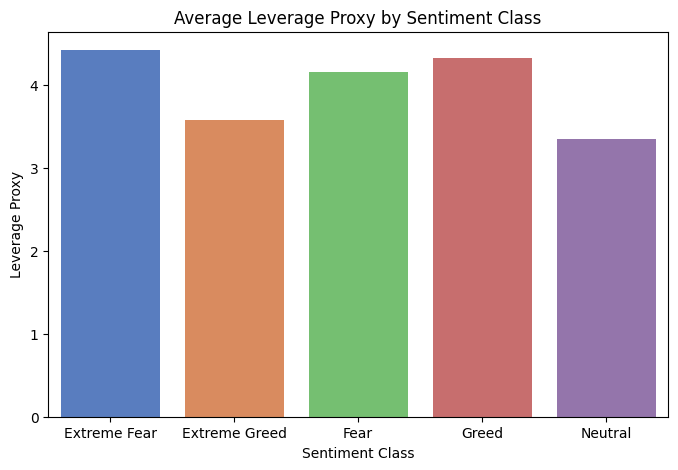

In [ ]:
#Average Leverage Proxy by Sentiment
lev_avg = df.groupby('sentiment_class')['leverage_proxy'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='sentiment_class', y='leverage_proxy', data=lev_avg, palette='muted')
plt.title('Average Leverage Proxy by Sentiment Class')
plt.ylabel('Leverage Proxy')
plt.xlabel('Sentiment Class')
plt.savefig('outputs/avg_leverage_by_sentiment.png', bbox_inches='tight')
plt.show()

/tmp/ipython-input-442726225.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment_class', y='fee_ratio', data=fee_avg, palette='magma')


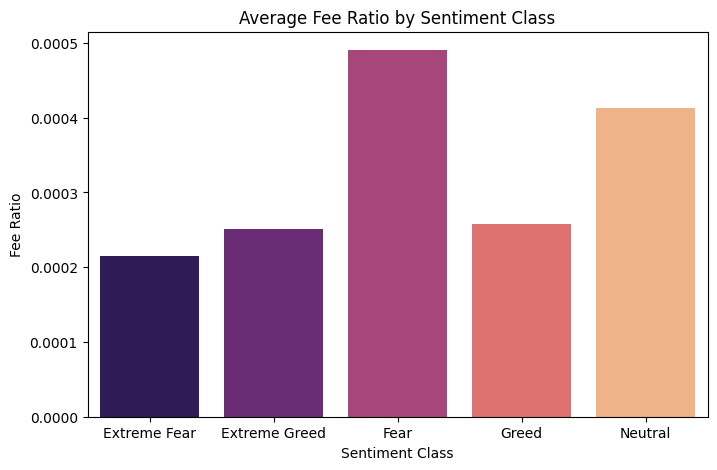

In [ ]:
# Average Fee Ratio by Sentiment
fee_avg = df.groupby('sentiment_class')['fee_ratio'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='sentiment_class', y='fee_ratio', data=fee_avg, palette='magma')
plt.title('Average Fee Ratio by Sentiment Class')
plt.ylabel('Fee Ratio')
plt.xlabel('Sentiment Class')
plt.savefig('outputs/avg_fee_ratio_by_sentiment.png', bbox_inches='tight')
plt.show()

/tmp/ipython-input-2166658483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crossed_pct,x='sentiment_class',y='Crossed',palette='cubehelix')


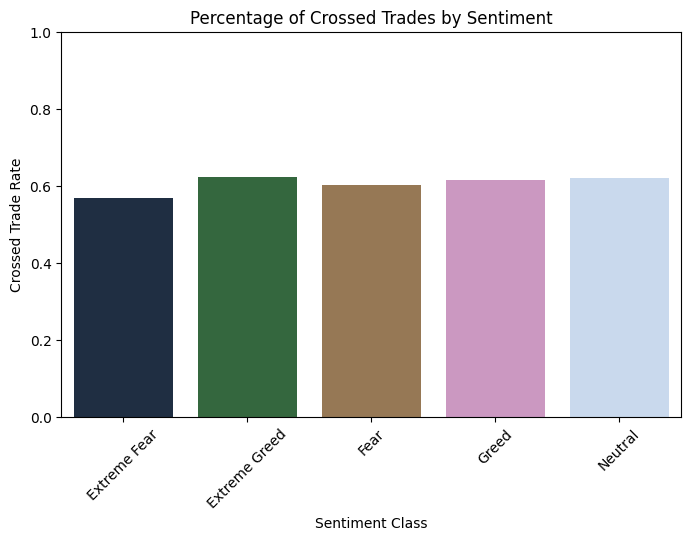

In [ ]:
#Crossed Trades Percentage by Sentiment
crossed_pct = df.groupby('sentiment_class')['Crossed'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=crossed_pct,x='sentiment_class',y='Crossed',palette='cubehelix')
plt.title('Percentage of Crossed Trades by Sentiment')
plt.ylabel('Crossed Trade Rate')
plt.xlabel('Sentiment Class')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.savefig('outputs/crossed_trades_by_sentiment.png', bbox_inches='tight')
plt.show()

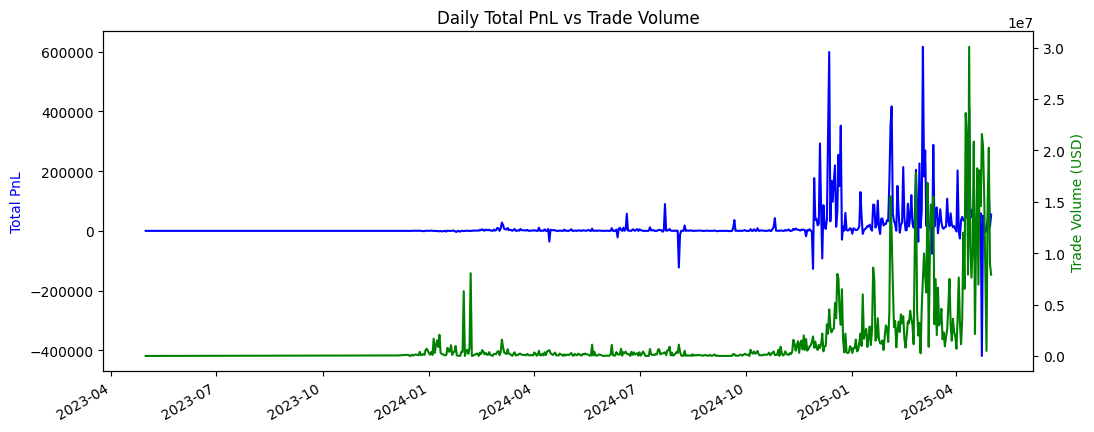

In [ ]:
#Daily Aggregates: Total PnL & Volume Over Time
daily_summary = df.groupby('date').agg({'Closed PnL':'sum','Size USD':'sum'}).reset_index()
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(daily_summary['date'], daily_summary['Closed PnL'], color='blue', label='Total PnL')
ax1.set_ylabel('Total PnL', color='blue')
ax2 = ax1.twinx()
ax2.plot(daily_summary['date'], daily_summary['Size USD'], color='green', label='Trade Volume')
ax2.set_ylabel('Trade Volume (USD)', color='green')

plt.title('Daily Total PnL vs Trade Volume')
fig.savefig('outputs/daily_pnl_vs_volume.png', bbox_inches='tight')
fig.autofmt_xdate()
plt.show()

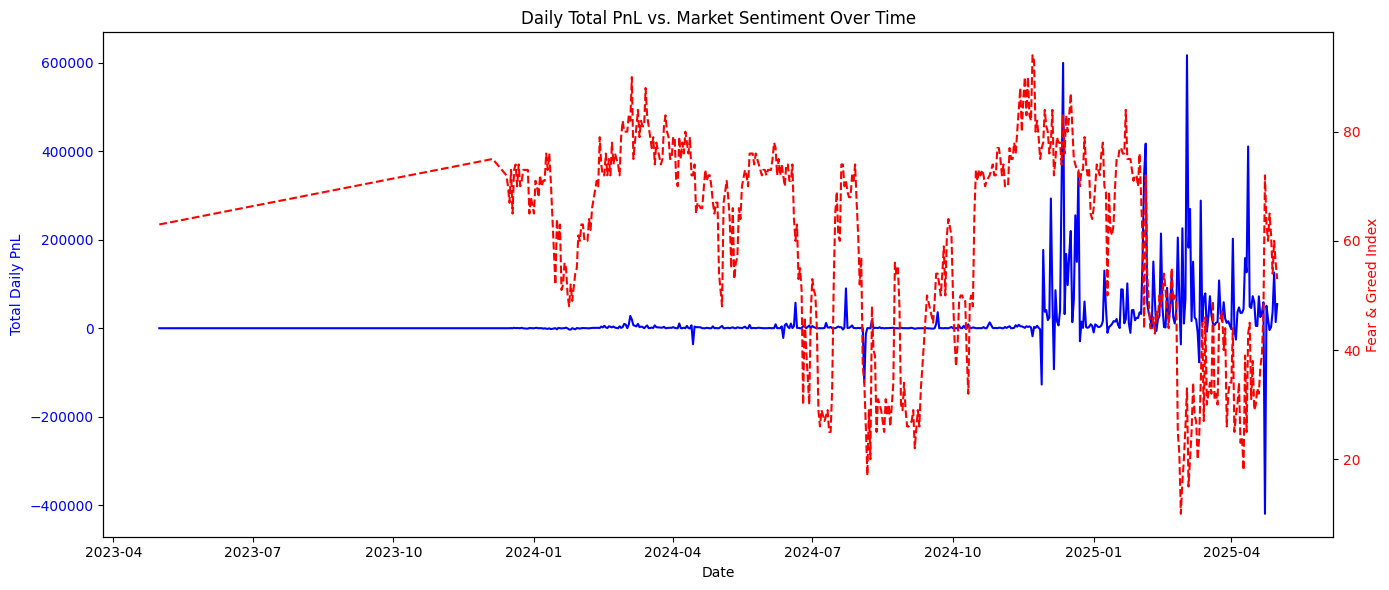

In [ ]:
#Daily Total PnL vs Market sentiment over time

# Merging per_account_day with sentiment_df
per_account_day_sentiment = pd.merge(per_account_day, sentiment_df, on='date', how='left')
per_account_day_sentiment = per_account_day_sentiment.dropna(subset=['sentiment_class'])

#creating daily_summary from this new DataFrame
daily_summary = per_account_day_sentiment.groupby('date').agg(
    total_pnl_sum=('Closed PnL_sum', 'sum'),
    sentiment_value=('sentiment_value', 'mean') # 'mean' or 'first' will work
).reset_index()
daily_summary = daily_summary.dropna() # Drop any remaining days with no sentiment

# Creating the dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Daily PnL', color='blue')
ax1.plot(daily_summary['date'], daily_summary['total_pnl_sum'], color='blue', label='Total PnL')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Fear & Greed Index', color='red')
ax2.plot(daily_summary['date'], daily_summary['sentiment_value'], color='red', label='Fear & Greed', linestyle='--')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Daily Total PnL vs. Market Sentiment Over Time')
fig.tight_layout()
plt.savefig('outputs/pnl_vs_sentiment_timeseries.png', bbox_inches='tight')
plt.show()


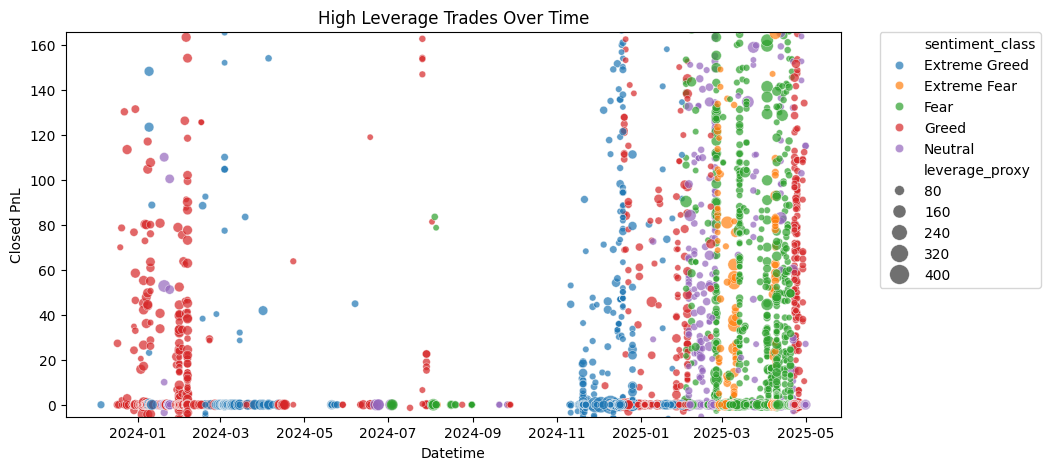

In [ ]:
# High Leverage Trades Highlight
high_lev = df[df['leverage_proxy'] > df['leverage_proxy'].quantile(0.95)]
plt.figure(figsize=(10,5))
sns.scatterplot(x='date', y='Closed PnL', hue='sentiment_class', size='leverage_proxy', sizes=(20,200), data=high_lev, alpha=0.7)
plt.title('High Leverage Trades Over Time')
plt.xlabel('Datetime')
plt.ylabel('Closed PnL')
lower, upper = df['Closed PnL'].quantile([0.05, 0.95])   # adjust quantiles if needed
plt.ylim(lower, upper)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('outputs/high_leverage_trades.png', bbox_inches='tight')
plt.show()

**Uncovering Hidden Trends**

In [ ]:
# Selecting the behavior metrics to define a "trader type"
features_for_clustering = ['Closed PnL_mean', 'Closed PnL_std', 'Size USD_mean', 'leverage_proxy_mean', 'is_win_mean']

# Creating a clean dataset for clustering
cluster_data = per_account_day[features_for_clustering].fillna(0)

# Scaling the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Running K-Means to find 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Adding the cluster label
per_account_day['trader_cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Analyzing the Clusters for naming
cluster_analysis = per_account_day.groupby('trader_cluster')[features_for_clustering].mean()
print(cluster_analysis)

                Closed PnL_mean  Closed PnL_std  Size USD_mean  \
trader_cluster                                                   
0                   -695.022202     1128.094697   47606.120918   
1                     57.420209      187.552505    4975.527154   
2                   6926.216742    11270.055766   20719.174122   

                leverage_proxy_mean  is_win_mean  
trader_cluster                                    
0                         59.825379     0.239781  
1                          3.952024     0.357691  
2                         23.985407     0.849242  


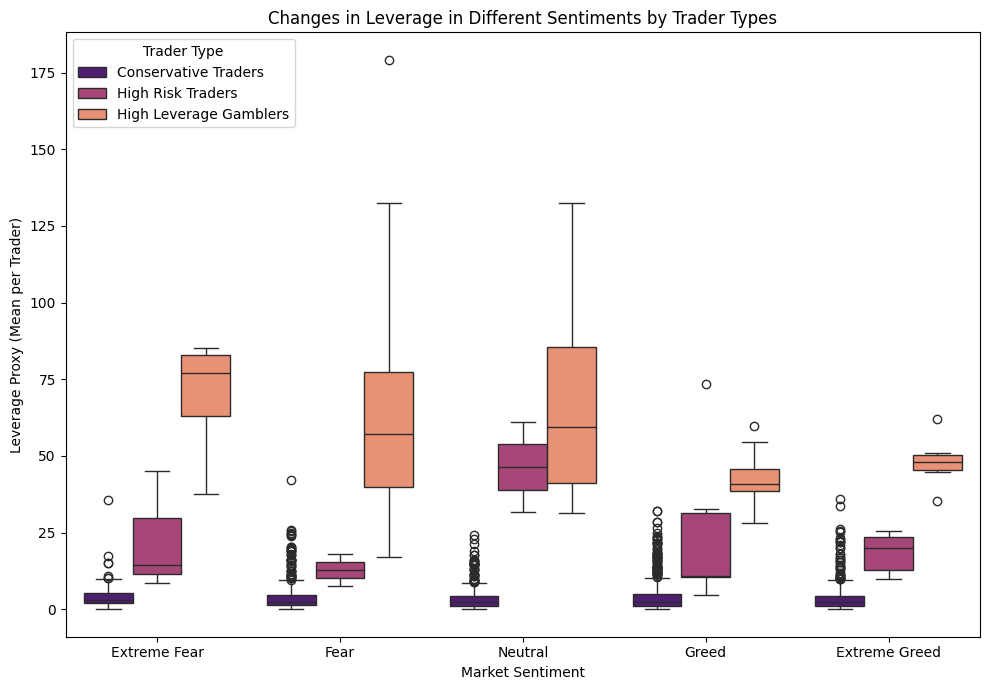

In [192]:
cluster_names = {
    0: 'High Leverage Gamblers',
    1: 'Conservative Traders',
    2: 'High Risk Traders'
}

# Merging dataframes to get sentiment and cluster names together
per_account_day_with_clusters = pd.merge(per_account_day, sentiment_df, on='date', how='left')
per_account_day_with_clusters = per_account_day_with_clusters.dropna(subset=['sentiment_class', 'trader_cluster'])
per_account_day_with_clusters['Trader Type'] = per_account_day_with_clusters['trader_cluster'].map(cluster_names)


# Generating Box Plot to view Behavior in Sentiment Zones
plt.figure(figsize=(10, 7))
sns.boxplot( data=per_account_day_with_clusters, x='sentiment_class', y='leverage_proxy_mean', hue='Trader Type', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'], palette='magma')
plt.title('Changes in Leverage in Different Sentiments by Trader Types')
plt.ylabel('Leverage Proxy (Mean per Trader)')
plt.xlabel('Market Sentiment')
plt.legend(title='Trader Type', loc='upper left')
plt.tight_layout()
plt.savefig('outputs/cluster_leverage_by_sentiment.png', bbox_inches='tight')
plt.show()


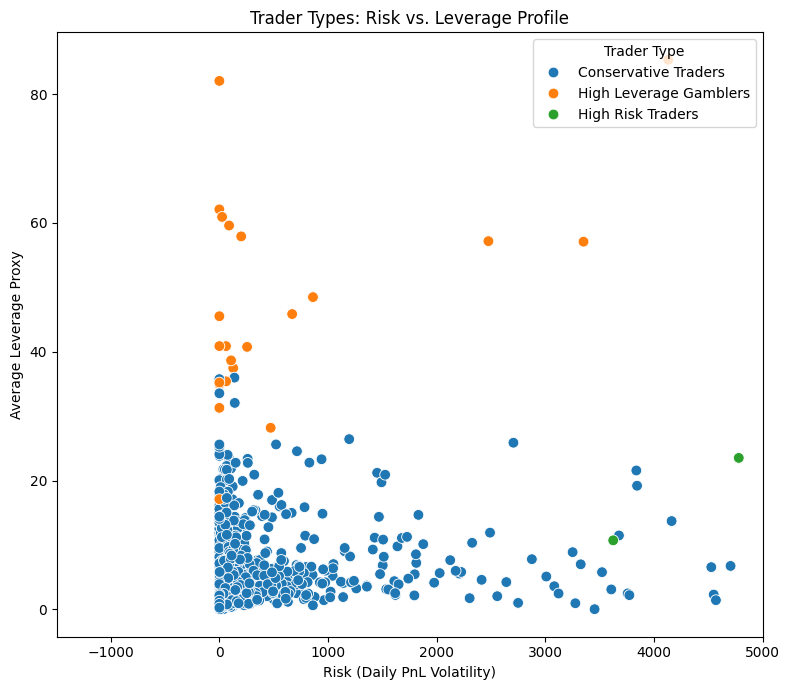

In [193]:
# Generateing Scatter Plot for Cluster Definitions
# Determining sample size for plotting
n_samples = min(2000, len(per_account_day_with_clusters))
plot_data = per_account_day_with_clusters.sample(n=n_samples, random_state=42)

plt.figure(figsize=(8, 7))
sns.scatterplot(data=plot_data, x='Closed PnL_std', y='leverage_proxy_mean', hue='Trader Type', s=60)
plt.xlim(right=5000)
plt.title('Trader Types: Risk vs. Leverage Profile')
plt.xlabel('Risk (Daily PnL Volatility)')
plt.ylabel('Average Leverage Proxy')
plt.legend(title='Trader Type', loc='upper right')
plt.tight_layout()
plt.savefig('outputs/cluster_risk_vs_leverage.png', bbox_inches='tight')
plt.show()

**Event Study**

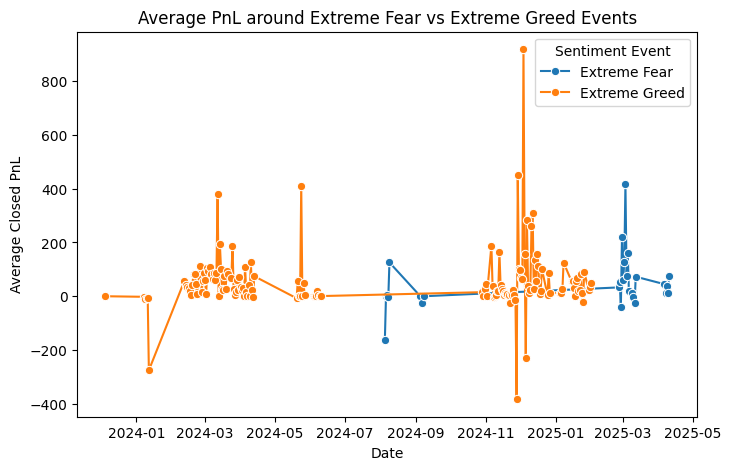

In [ ]:
#  Average PnL 1 day before and after Extreme Fear and Greed
# Identify extreme sentiment days
ext_fear_days = sentiment_df[sentiment_df['classification']=='Extreme Fear']['date']
ext_greed_days = sentiment_df[sentiment_df['classification']=='Extreme Greed']['date']

# Helper function: calculate avg PnL 1 day before, during, and after the event
def event_avg_pnl(days, label):
    # Ensure days are datetime
    days = pd.to_datetime(days)

    # Generate list of all dates for -1, 0, +1
    event_dates = []
    for d in days:
        event_dates.extend([d - pd.Timedelta(days=1), d, d + pd.Timedelta(days=1)])

    temp_df = trades_df[trades_df['date'].isin(event_dates)]
    summary = temp_df.groupby('date')['Closed PnL'].mean().reset_index()
    summary['event_type'] = label
    return summary

# Generating summaries for both events
fear_summary = event_avg_pnl(ext_fear_days, 'Extreme Fear')
greed_summary = event_avg_pnl(ext_greed_days, 'Extreme Greed')

# Combining summaries
event_summary = pd.concat([fear_summary, greed_summary])

# Visualization
plt.figure(figsize=(8,5))
sns.lineplot(x='date', y='Closed PnL', hue='event_type', data=event_summary, marker='o')
plt.title('Average PnL around Extreme Fear vs Extreme Greed Events')
plt.xlabel('Date')
plt.ylabel('Average Closed PnL')
plt.legend(title='Sentiment Event')
plt.savefig('outputs/event_study_extreme_fear_greed.png', bbox_inches='tight')
plt.show()

**Predictions**

              precision    recall  f1-score   support

           0       0.60      0.37      0.46       177
           1       0.69      0.85      0.76       292

    accuracy                           0.67       469
   macro avg       0.65      0.61      0.61       469
weighted avg       0.66      0.67      0.65       469



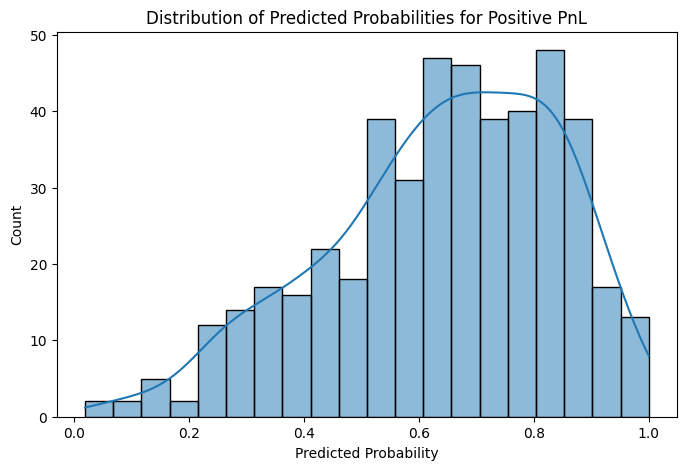

Size USD_mean          0.120203
fee_ratio_mean         0.119926
Size USD_sum           0.117545
leverage_proxy_mean    0.117141
sentiment_value        0.099718
Closed PnL_sum         0.085419
Closed PnL_mean        0.083656
is_win_mean            0.075851
Closed PnL_std         0.075569
Crossed_mean           0.055939
dtype: float64


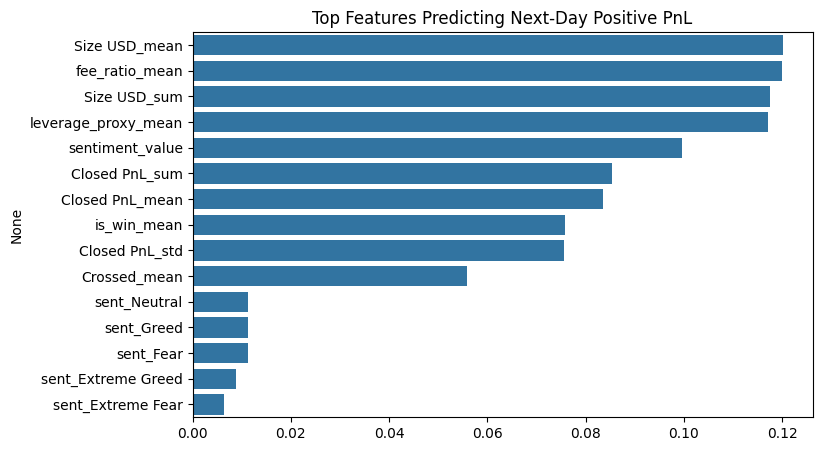

In [ ]:
# Prepare target: next day positive PnL
per_account_day = per_account_day.sort_values(['Account','date'])
per_account_day['next_day_pnl'] = per_account_day.groupby('Account')['Closed PnL_sum'].shift(-1)
per_account_day['next_day_pos'] = (per_account_day['next_day_pnl']>0).astype(int)

# Features for model
X = per_account_day[['Closed PnL_sum','Closed PnL_mean','Closed PnL_std','Size USD_sum','Size USD_mean','is_win_mean','fee_ratio_mean','Crossed_mean','leverage_proxy_mean','sentiment_value']].fillna(0)
X = pd.concat([X, pd.get_dummies(per_account_day['sentiment_class'], prefix='sent')], axis=1)
y = per_account_day['next_day_pos'].fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

probs = clf.predict_proba(X_test)[:,1]
plt.figure(figsize=(8,5))
sns.histplot(probs, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities for Positive PnL')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.savefig('outputs/predicted_probabilities_positive_pnl.png', bbox_inches='tight')
plt.show()

# Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Top Features Predicting Next-Day Positive PnL')
plt.savefig('outputs/feature_importance_positive_pnl.png', bbox_inches='tight')
plt.show()


R2 Score: 0.08094671314131185
RMSE: 1164.1459171536344


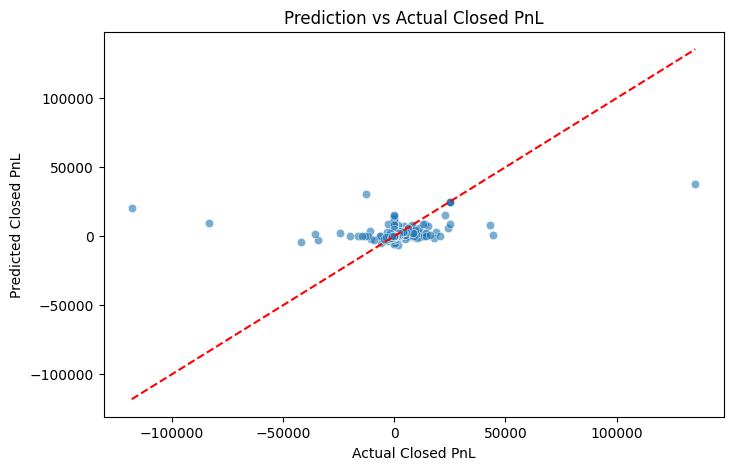

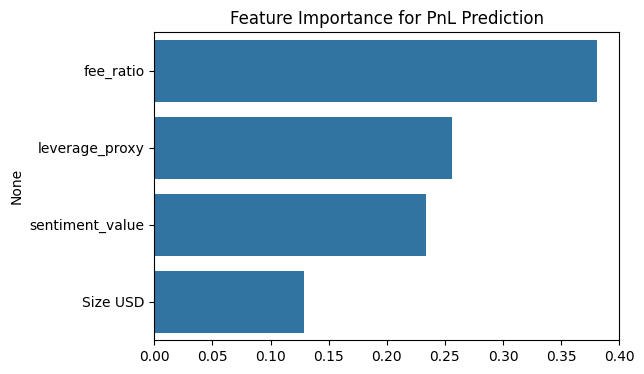

In [ ]:
# Select features
features = ['Size USD','leverage_proxy','fee_ratio','sentiment_value']
X = df[features]
y = df['Closed PnL']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Closed PnL')
plt.ylabel('Predicted Closed PnL')
plt.title('Prediction vs Actual Closed PnL')
plt.savefig('outputs/prediction_vs_actual_pnl.png', bbox_inches='tight')
plt.show()

feat_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title('Feature Importance for PnL Prediction')
plt.savefig('outputs/feature_importance_pnl_regression.png', bbox_inches='tight')
plt.show()